# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
#df = pd.read_csv("/content/gdrive/MyDrive/W24ML Code/Data/fraudTest.csv")
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\willi\AppData\Local\Temp\ipykernel_14560\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\willi\AppData\Local\Temp\ipykernel_14560\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [6]:
X

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,302,33,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,34496,53,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,54767,15,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,1126,17,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,False,False,False,False,False,True,False,False,False,False,False,False,False,False
555715,111.84,28739,9,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555716,86.88,3684,15,False,False,False,False,False,False,False,True,False,False,False,False,False,False
555717,7.99,129,24,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [9]:
X_train

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
304012,9.92,757530,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
350242,53.90,467,8,False,False,True,False,False,False,False,False,False,False,False,False,False,False
225645,70.26,4056,52,False,False,False,False,False,False,False,False,False,False,False,False,True,False
432498,249.61,1304,49,False,False,False,False,False,False,False,False,False,False,False,True,False,False
58863,25.80,217,54,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511520,10.42,3224,54,False,False,False,False,False,False,False,True,False,False,False,False,False,False
487614,95.30,2135,52,True,False,False,False,False,False,False,False,False,False,False,False,False,False
38395,9.28,20478,16,False,False,False,False,False,False,False,False,False,False,False,False,True,False
545342,56.43,320,26,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [10]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

In [12]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = .3)

In [13]:
X_test1, X_holdout1, y_test1, y_holdout1 = train_test_split(X_test, y_test, test_size = .5)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [15]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [16]:
smote_X1, smote_y1 = smote.fit_resample(X_train1, y_train1)

# 3.) Train three logistic regression models

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [19]:
over_log.score(X_test, y_test)

0.9242784135895775

In [20]:
under_log.score(X_test, y_test)

0.928357206266945

In [21]:
smote_log.score(X_test, y_test)

0.9241344562009645

In [22]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [23]:
# Sensitivity here in credit fraud is more important as seen from last class

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
y_true = y_test

In [26]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76807,  6233],
       [   79,   239]], dtype=int64)

In [27]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7515723270440252


In [28]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77146,  5894],
       [   78,   240]], dtype=int64)

In [29]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7547169811320755


In [30]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76795,  6245],
       [   79,   239]], dtype=int64)

In [31]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7515723270440252


In [32]:
X_train

X_traindf = pd.DataFrame(X_train)
y_traindf = pd.DataFrame(y_train)
y_traindf

,is_fraud
304012,0
350242,0
225645,0
432498,0
58863,0
...,...
511520,0
487614,0
38395,0
545342,0


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [33]:
raw_temp = pd.concat([X_train1, y_train1], axis =1)
raw_temp

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
268730,126.75,782,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
547086,82.13,10076,46,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0
425113,193.77,1131,51,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0
517946,63.46,19090,25,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0
156594,9.77,1675,8,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523740,595.13,94325,35,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
121400,1.48,493806,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
391165,517.92,1504,11,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0
100051,23.59,241,8,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0


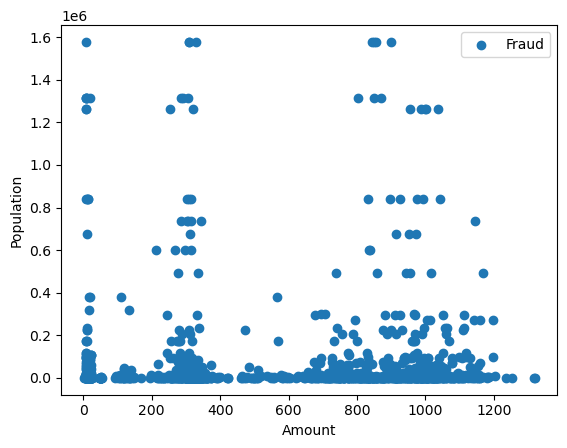

In [34]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [35]:

raw_temp = pd.concat([smote_X1, smote_y1], axis =1)


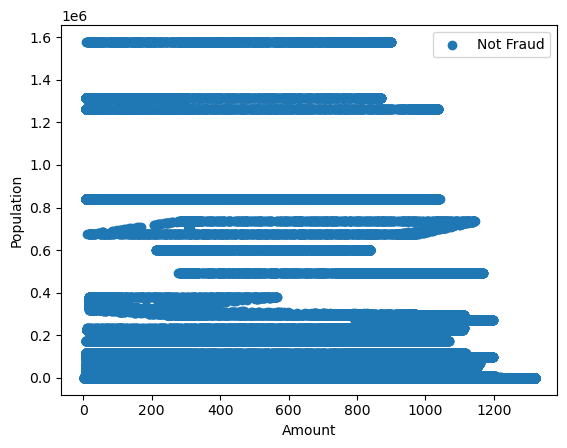

In [36]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [38]:
resampling_methods = {
    "over" : RandomOverSampler(),
    "under" : RandomUnderSampler(),
    "smote" : SMOTE()
    }  
model_configs= {
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty = "l1", 
                                 C = 2.,solver = "liblinear"), 
    "DTREE" : DecisionTreeClassifier()
    }

In [39]:
def calc_perf_metric(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [40]:
trained_models = {}
results = []

In [41]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        m = model.fit(resample_X, resample_y)
        trained_models[combined_key] =  m  #model.fit(resample_X, resample_y)
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_true, y_pred)
        holdout = m.score(X_holdout, y_holdout)
        results.append({"Model" : combined_key,
                      "sensitivity" : sensitivity,
                      "specificity" : specificity,
                      "Precision" : precision,
                      "Recall" : recall,
                      "f1" : f1,
                      "Holdout" : holdout})
        #########
        #results.append(calc_perf_metric(y_true, y_pred)
      
        print(combined_key)

over_LOG
over_LASSO
over_DTREE
under_LOG
under_LASSO
under_DTREE
smote_LOG
smote_LASSO
smote_DTREE


In [42]:
results_df = pd.DataFrame(results)
results_df

,Model,sensitivity,specificity,Precision,Recall,f1,Holdout
0,over_LOG,0.751572,0.925301,0.037100,0.751572,0.070710,0.923187
1,over_LASSO,0.751572,0.925325,0.037112,0.751572,0.070731,0.923175
2,over_DTREE,0.534591,0.998579,0.590278,0.534591,0.561056,0.996989
3,under_LOG,0.754717,0.906647,0.030030,0.754717,0.057762,0.903357
4,under_LASSO,0.754717,0.905889,0.029795,0.754717,0.057327,0.902649
5,under_DTREE,0.959119,0.944605,0.062181,0.959119,0.116791,0.944660
6,smote_LOG,0.751572,0.924530,0.036735,0.751572,0.070047,0.922419
7,smote_LASSO,0.751572,0.924542,0.036741,0.751572,0.070057,0.922443
8,smote_DTREE,0.701258,0.993027,0.278055,0.701258,0.398214,0.992250


Across all metrics the over_DTREE is the most balanced, while other have higher scores, overall DTREE performs the most measured and captures the most information. Looking at the performance across all models I predict that over_DTREE will probably be the best predictive model, as it has the highest f1 score.

And it does perform the best on the holdout data.

In [43]:
#results_df1 = pd.DataFrame(results)
#results_df1

In [44]:
#trained_models.over_LASSO.score(X_holdout, y_holdout)

### Random Notes

In [45]:
#confusion_matrix()?

In [46]:
# def calc_perf_metric(y_true, y_pred):
#     tn, fp, fn, tp confusion_matrix(y_true, y_pred)
#     sensitivity = tp / (tp + fn)
#     specificity = tn / (tn + fp)
#     precision = precision_score(y_true, y_pred)
#     recall = recall_score(y_true, y_pred)
#     f1 = f1_score(y_true, y_pred)
    
#     return(sensitivity, specificity, precision, recall, f1)

In [47]:
#trained_models

In [48]:
#trained_models[key1]="values1"